In [65]:
# Import a library
import numpy as np
import pandas as pd
import docx
from datetime import datetime
import pyreadstat
import matplotlib.pyplot as plt

#  Read SPSS file

spss_file_path = ('Marketing Research.sav')

df, meta = pyreadstat.read_sav(spss_file_path, apply_value_formats=True)

# Save output as csv
csv_file_path =('Marketing Research.csv')
df.to_csv(csv_file_path, index=False)
print(df.head())

# Display column names
print(df.columns)

# Get the shape (rows, columns)
print(f"Dataset shape: {df.shape}")

# Overview of data types and non-null counts
print(df.info())
# print(f"SPSS file '{spss_file_path}' successfully converted to CSV: '{csv_file_path}'"


print( meta.column_labels)

# Get variable labels from meta and set them as column names
variable_labels = meta.column_labels
df.columns = variable_labels  # Replace column names with variable labels
print(df.columns)







   qnrnumb visit        howoft            likenet           research  \
0      1.0   Yes  Almost never           Disagree            Neutral   
1      2.0   Yes  Occasionally            Neutral              Agree   
2      3.0   Yes  Occasionally            Neutral            Neutral   
3      4.0   Yes  Occasionally            Neutral              Agree   
4      5.0   Yes         Never  Strongly Disagree  Strongly Disagree   

             safeweb           goodtool         notouse            another  \
0           Disagree  Strongly Disagree           Agree              Agree   
1            Neutral            Neutral  Strongly Agree            Neutral   
2            Neutral            Neutral         Neutral            Neutral   
3            Neutral           Disagree           Agree           Disagree   
4  Strongly Disagree  Strongly Disagree         Neutral  Strongly Disagree   

            likeproc  ...    worth  sticker   actual   age   marital children  \
0  Strongly Disag

In [66]:
# # DEMOGRAPHICS
race=df['What is your race?'].value_counts()
print(race)

What is your race?
Caucasian          959
Black              217
Asian              127
Hispanic            87
Other                8
American Indian      2
Name: count, dtype: int64


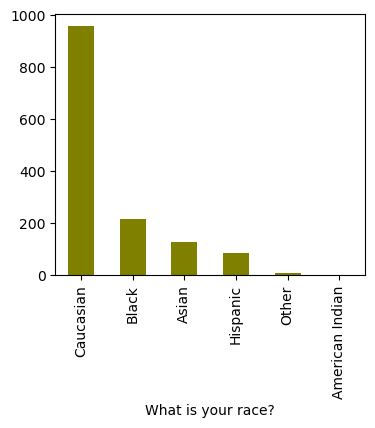

In [67]:
plt.figure(figsize=(4,3.4))
race.plot(kind='bar', color='olive')
plt.show()

In [68]:
age=df['What is your age?'].value_counts()
age

What is your age?
34.0    69
37.0    68
35.0    64
33.0    63
27.0    60
36.0    58
32.0    55
28.0    53
38.0    53
40.0    53
41.0    52
29.0    47
39.0    45
30.0    45
43.0    45
42.0    43
31.0    42
26.0    42
25.0    41
24.0    37
44.0    37
47.0    36
45.0    35
46.0    33
23.0    29
21.0    27
22.0    27
48.0    21
49.0    20
51.0    18
52.0    16
55.0    15
50.0    14
54.0    10
53.0     7
57.0     6
56.0     3
58.0     2
59.0     2
65.0     2
60.0     2
61.0     1
62.0     1
66.0     1
Name: count, dtype: int64

In [69]:

# Define bins and labels
bins = [20, 30, 40, 50, 60,70]  # Bin edges
labels = ['20–29', '30–39', '40–49','50-59', '60-69',]  # Bin labels

# Create a new column for age groups
df['Age'] = pd.cut(df['What is your age?'], bins=bins, labels=labels, right=False)
age=df['Age'].value_counts()

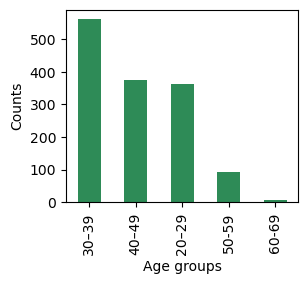

In [70]:
plt.figure(figsize=(3,2.5))
age.plot(kind='bar', color='seagreen')
plt.xlabel('Age groups')
plt.ylabel("Counts")
plt.show()

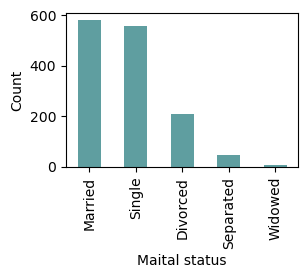

In [71]:

mar_status=df["What is your marital status?"].value_counts()
plt.figure(figsize=(3, 2))  # Set the desired size 
# Create the bar chart
mar_status.plot(kind='bar', color='cadetblue')
# plt.title('Marital Status')
plt.xlabel('Maital status')
plt.ylabel('Count')
plt.show()

### **Children**

In [83]:
# Replace 0 with NaN in the specified column
df['How many children under the age of 18 are living with you?'] = df['How many children under the age of 18 are living with you?'].replace(np.nan,0)
children_statisctics=df['How many children under the age of 18 are living with you?'].describe()
children_statisctics

count    1400.000000
mean        0.915714
std         1.086026
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: How many children under the age of 18 are living with you?, dtype: float64

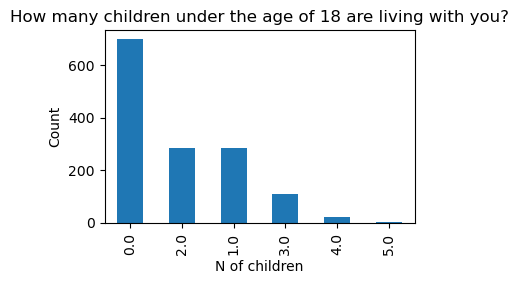

In [92]:
children_count=df['How many children under the age of 18 are living with you?'].value_counts()
plt.figure(figsize=(4, 2.5))  # Set the desired size 
# Create the bar chart
children_count.plot(kind='bar')
plt.title('How many children under the age of 18 are living with you?')
plt.xlabel('N of children')
plt.ylabel('Count')
plt.show()


### **Education**

['10%', '11%', '16%', '16%', '21%', '23%']


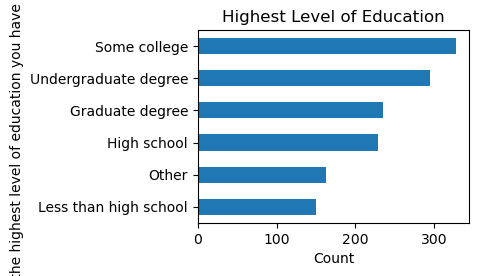

In [112]:
education=df['What is the highest level of education you have completed?'].value_counts().sort_values(ascending=True)
prcntg = [f"{int((x / len(df) * 100))}%" for x in education]
print(prcntg)
plt.figure(figsize=(3.5, 2.5))  # Set the desired size 
# Create the bar chart
education.plot(kind='barh')
plt.title('Highest Level of Education')
plt.xlabel('Count')
# plt.ylabel('Count')
plt.show()

What is the highest level of education you have completed?
Less than high school    150
Other                    163
High school              229
Graduate degree          235
Undergraduate degree     295
Some college             328
Name: count, dtype: int64
CategoricalIndex(['Less than high school', 'Other', 'High school',
                  'Graduate degree', 'Undergraduate degree', 'Some college'],
                 categories=['Graduate degree', 'High school', 'Less than high school', 'Other', 'Some college', 'Undergraduate degree'], ordered=False, dtype='category', name='What is the highest level of education you have completed?')
['10%', '11%', '16%', '16%', '21%', '23%']


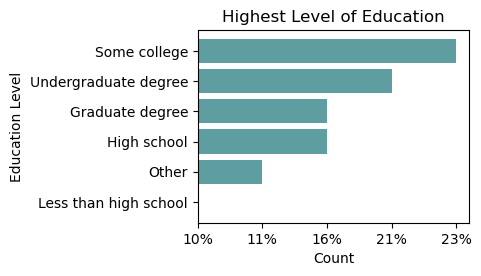

In [121]:
import matplotlib.pyplot as plt

# Get value counts and sort
education_count = df['What is the highest level of education you have completed?'].value_counts().sort_values(ascending=True)

# Print value counts and unique levels
print(education_count)
ed_levels = education_count.index  # Get education levels (the index of value_counts)
print(ed_levels)

# Calculate percentage for each education level
prcntg = [f"{int((x / len(df)) * 100)}%" for x in education_count]

# Print percentages
print(prcntg)

# Create the bar chart
plt.figure(figsize=(3.5, 2.5))  # Set the desired size
plt.barh(ed_levels, prcntg, color='cadetblue')

# Add labels and title
plt.title('Highest Level of Education')
plt.xlabel('Count')
plt.ylabel('Education Level')

# Display the chart
plt.show()
